In [ ]:
# analyse data from csv. how can I improve it?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# smooth function, adapted from scipy formula at http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    if window == 'flat':
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [3]:
columns = ['Center Image','Left Image','Right Image','Steering Angle','Throttle', 'Break', 'Speed']
df = pd.read_csv('driving_log.csv', names=columns)

In [4]:
df.columns

Index(['Center Image', 'Left Image', 'Right Image', 'Steering Angle',
       'Throttle', 'Break', 'Speed'],
      dtype='object')

In [5]:
df.describe()

,Steering Angle,Throttle,Break,Speed
count,31568.000000,31568.000000,31568.000000,31568.000000
mean,-0.018617,0.960573,0.000595,28.024577
std,0.223630,0.182533,0.021443,6.251212
min,-1.000000,0.000000,0.000000,0.000036
25%,-0.070443,1.000000,0.000000,30.184100
50%,0.000000,1.000000,0.000000,30.190140
75%,0.000000,1.000000,0.000000,30.190360
max,1.000000,1.000000,1.000000,30.634410


In [6]:
from datetime import datetime
def to_time(s):
    s = s.replace('/Users/lucasosouza/Documents/CarND/P3/IMG/center_', '')
    s = s.replace('.jpg', '')
    s = datetime.strptime(s, '%Y_%m_%d_%H_%M_%S_%f')
    
    return s

def seconds_in_timedelta(td):
    return td.seconds

seconds_in_timedelta(to_time(df.iloc[0, 0]) - to_time(df.iloc[0, 0]))

0

In [7]:
df['time'] = df['Center Image'].apply(to_time)
df['time_diff'] = (df['time'] - df['time'].shift(1)).fillna(value=0).apply(seconds_in_timedelta)

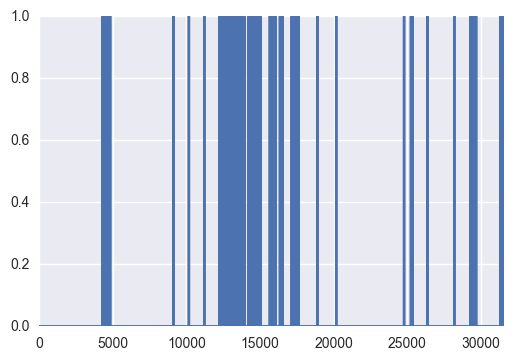

In [8]:
plt.ylim((0,1))
df['time_diff'].plot()

In [9]:
## need to divide into groups
df['group'] = 0
i = 1
for row in df.iterrows():
    if row[1]['time_diff'] > 0:
        i+=1
    df.ix[row[0], 'group'] = i

In [10]:
df.head()

,Center Image,Left Image,Right Image,Steering Angle,Throttle,Break,Speed,time,time_diff,group
0,/Users/lucasosouza/Documents/CarND/P3/IMG/cent...,/Users/lucasosouza/Documents/CarND/P3/IMG/lef...,/Users/lucasosouza/Documents/CarND/P3/IMG/rig...,0.0,0.0,0.0,0.000078,2016-12-17 22:02:01.160,0,1
1,/Users/lucasosouza/Documents/CarND/P3/IMG/cent...,/Users/lucasosouza/Documents/CarND/P3/IMG/lef...,/Users/lucasosouza/Documents/CarND/P3/IMG/rig...,0.0,0.0,0.0,0.000080,2016-12-17 22:02:01.262,0,1
2,/Users/lucasosouza/Documents/CarND/P3/IMG/cent...,/Users/lucasosouza/Documents/CarND/P3/IMG/lef...,/Users/lucasosouza/Documents/CarND/P3/IMG/rig...,0.0,0.0,0.0,0.000080,2016-12-17 22:02:01.365,0,1
3,/Users/lucasosouza/Documents/CarND/P3/IMG/cent...,/Users/lucasosouza/Documents/CarND/P3/IMG/lef...,/Users/lucasosouza/Documents/CarND/P3/IMG/rig...,0.0,0.0,0.0,0.000078,2016-12-17 22:02:01.470,0,1
4,/Users/lucasosouza/Documents/CarND/P3/IMG/cent...,/Users/lucasosouza/Documents/CarND/P3/IMG/lef...,/Users/lucasosouza/Documents/CarND/P3/IMG/rig...,0.0,0.0,0.0,0.000078,2016-12-17 22:02:01.574,0,1


In [11]:
vc = df['group'].value_counts()
len(vc), vc.mean()

(160, 197.3)

131 recordings, with an average of 134 frames each (that is about 13 seconds average)

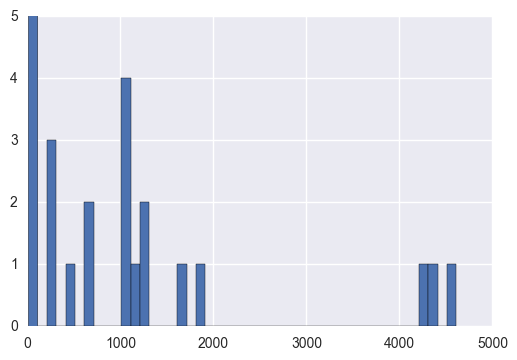

In [12]:
binwidth=100
plt.ylim(0,5)
plt.hist(vc, bins=range(min(vc), max(vc) + binwidth, binwidth));

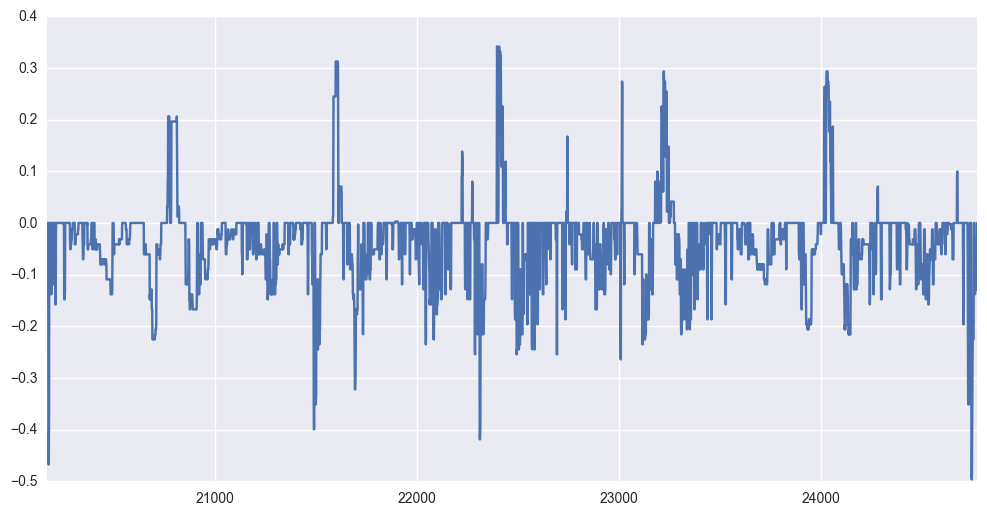

In [13]:
# df[df['group']==vc.iloc[0]]['Steering Angle']
plt.figure(figsize=(12,6))
df.ix[df['group']==vc.index[0]]['Steering Angle'].plot()
# sns.lmplot(data=df.ix[df['group']==vc.index[0], :], y='Steering Angle', x='time_diff')

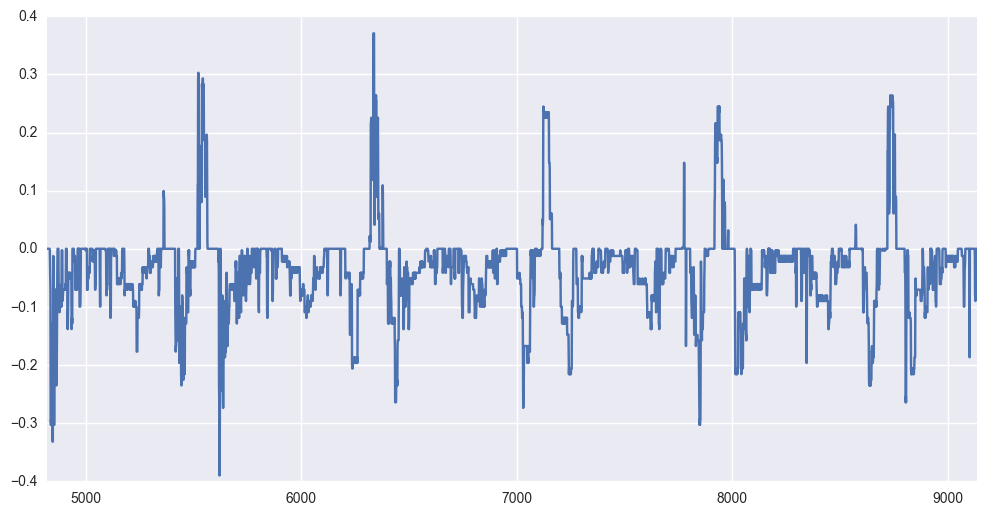

In [14]:
plt.figure(figsize=(12,6))
df.ix[df['group']==vc.index[1]]['Steering Angle'].plot()

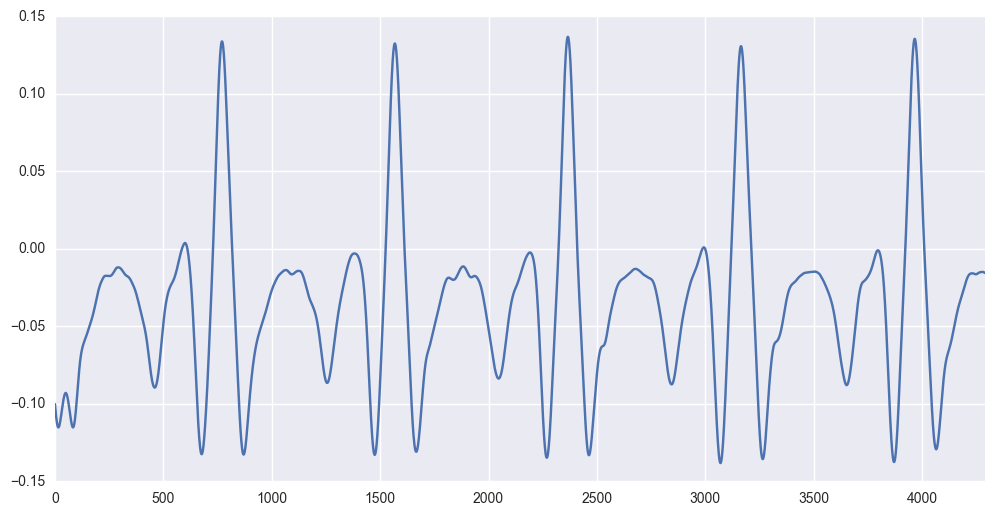

In [15]:
angles = df.ix[df['group']==vc.index[1]]['Steering Angle']
plt.figure(figsize=(12,6))
pd.Series(smooth(angles, window_len=100))[:vc[1]].plot()

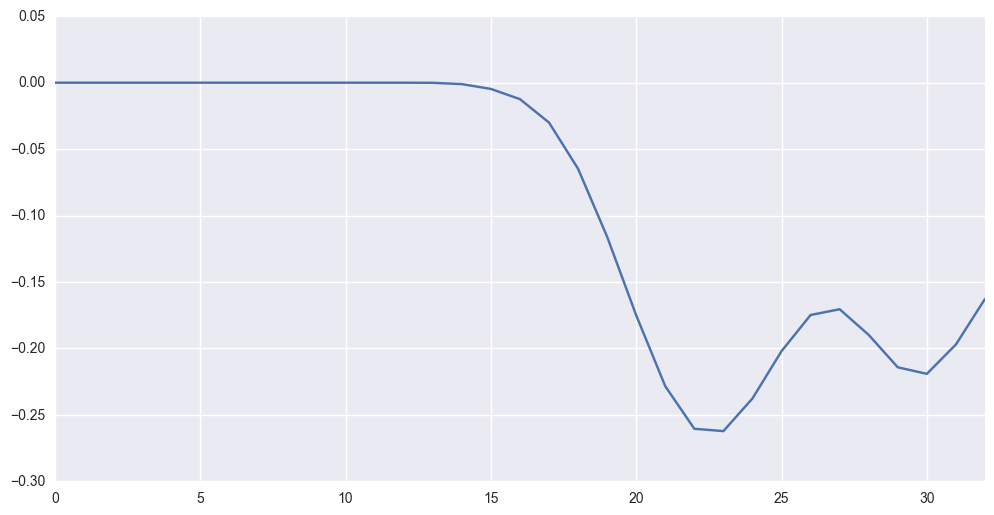

In [19]:
angles = df.ix[df['group']==vc.index[1]]['Steering Angle']
plt.figure(figsize=(12,6))
pd.Series(smooth(angles,window_len=10))[:vc[3]].plot()

### Converting the data and exporting

In [ ]:
## steps 
## convert data for each group
## save it in a separate column
## save it in pickle file

In [190]:
smooth_window_len=30
for group, count in zip(vc.index, vc):
    if count>smooth_window_len/2:
        smoothed = smooth(df.ix[df['group']==group, 'Steering Angle'], window_len=smooth_window_len)[:count] 
        df.ix[df['group']==group, 'Smoothed Angle'] = smoothed
    else:
        df.ix[df['group']==group, 'Smoothed Angle'] = df.ix[df['group']==group, 'Steering Angle']
        #print(df.ix[df['group']==group, 'Smoothed Angle'].shape, smoothed.shape) # = smooth

In [191]:
df[['Smoothed Angle', 'Steering Angle']].describe()

,Smoothed Angle,Steering Angle
count,17606.000000,17606.000000
mean,-0.018333,-0.024585
std,0.220364,0.216958
min,-0.928989,-1.000000
25%,-0.090615,-0.080126
50%,-0.025500,-0.002663
75%,0.004025,0.000000
max,1.000000,1.000000


In [193]:
# export dataframe
df.to_pickle('driving.p')

In [197]:
vc[:100]

20     4315
1      4291
23     1050
22     1041
21     1033
104     623
120     610
112     299
79      260
111     216
129      83
123      81
124      78
94       51
86       46
40       45
116      44
65       44
26       44
72       44
68       43
96       42
88       41
2        41
78       40
66       40
50       40
121      40
71       39
83       39
       ... 
84       30
98       30
51       30
102      30
74       30
5        30
42       30
82       29
67       29
64       29
16       29
39       29
77       29
75       29
56       29
29       29
58       29
59       29
54       28
80       28
37       28
53       28
91       28
33       28
85       28
46       28
109      27
45       27
44       27
35       27
Name: group, dtype: int64

In [ ]:
: